# Part II - Ford GoBike Presentation
## by Chibuike Lawrence Orji-Oko

## Investigation Overview


> In this investigation, I wanted to learn more about the users, trip duration, what time and day of the week were most ride taken.


## Dataset Overview

> This is an exploration of the Ford GoBike dataset. The Ford GoBike Dataset consists of information about individual rides made in a bike-sharing system covering greater San Francisco. The data features include duration (secs), DateTime, customer type, gender, station name, and some additional variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df['start_time'] = df['start_time'].astype('datetime64[ns]')  
df['end_time'] = df['end_time'].astype('datetime64[ns]')     
df['start_station_id'] = df['start_station_id'].astype(str)  
df['end_station_id'] = df['end_station_id'].astype(str)      
df['bike_id'] = df['bike_id'].astype(str)                    
df['member_gender'] = df['member_gender'].astype('category') 
df['user_type'] = df['user_type'].astype('category')         

df['member_gender'].fillna(df['member_gender'].mode()[0], inplace=True)
df['member_birth_year'] = df['member_birth_year'].fillna(df['member_birth_year'].mean())

df['member_birth_year'] = df['member_birth_year'].astype(int)

import datetime as dt
df['start_hour'] = df['start_time'].dt.hour
df['start_hour'] = df['start_hour'].astype(str)
df['start_day'] = df['start_time'].dt.day_name()
df['start_month'] = df['start_time'].dt.month_name()

df['end_hour'] = df['end_time'].dt.hour
df['end_hour'] = df['start_hour'].astype(str)
df['end_day'] = df['end_time'].dt.day_name()
df['end_month'] = df['end_time'].dt.month_name()

## The Distribution of User Types

> Most of the Ford GoBike users are subscribers (89.2%).

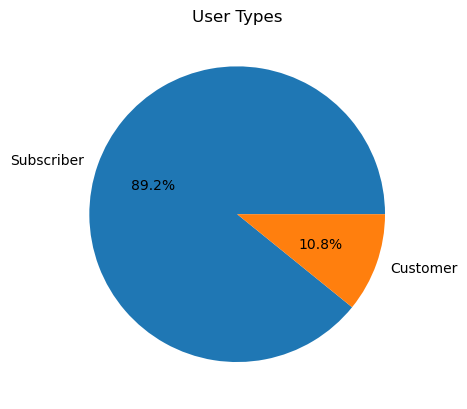

In [4]:
users = df['user_type'].value_counts()/df['user_type'].value_counts().sum()
plt.pie(users, labels = users.index, autopct='%1.1f%%')
plt.title('User Types');

## Age Distribution of Users

> There are 75 different birth year groups of Ford GoBike users. 20 (1979 - 1998) out of the 75 different age group accounts for 77.6% of the entire users of Ford GoBike system.

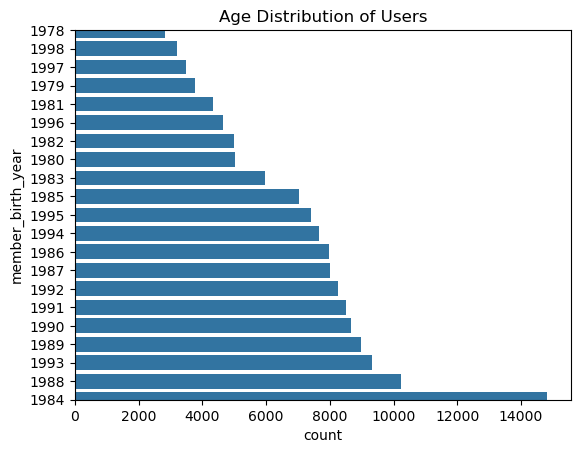

In [5]:
birth_order = df['member_birth_year'].value_counts().index
base_color = sns.color_palette()[0]
sns.countplot(data=df, y='member_birth_year', color=base_color, order=birth_order)
plt.ylim((0,20));
plt.title('Age Distribution of Users');

## Hourly Distribution of Rides

> The most busy hours are during the rush hours of a day, between the hours of 7AM and 9AM when people are going to work, and between the hours of 4PM and 6PM when people are returning back from work.

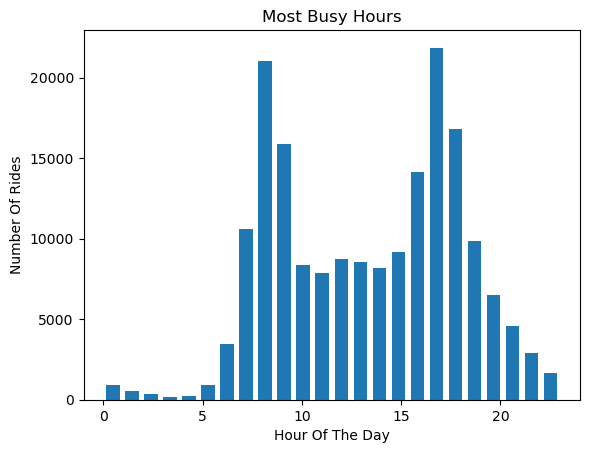

In [6]:
data = df['start_time'].dt.hour
plt.hist(data,rwidth=.7, bins = 24)
plt.title('Most Busy Hours')
plt.xlabel('Hour Of The Day')
plt.ylabel('Number Of Rides');

## Daily Distribution of Rides

> Thursdays have the hightest trips, followed by Tuedays. While weekends (Saturdays and Sundays) have the lowest rides.

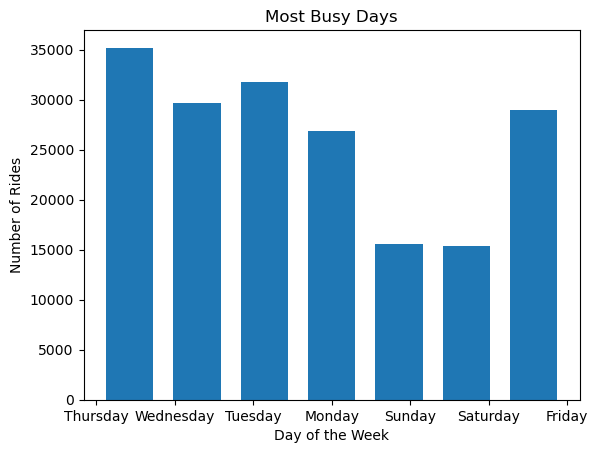

In [7]:
data = df['start_time'].dt.day_name()
plt.hist(data,rwidth=.7, bins = 7)
plt.title('Most Busy Days')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides');

## Gender Distribution of Rides

> Most users are males. 75.74% of the users of the Ford GoBike system are males while 22.27% are females. Those that filled "other" as gender account for 1.99% of the total rides.

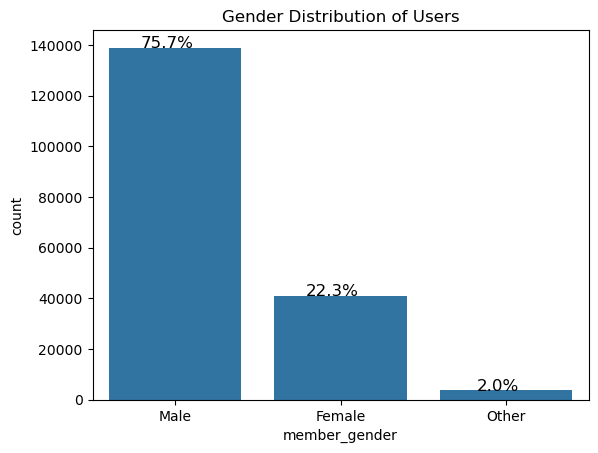

In [8]:
gender_order = df['member_gender'].value_counts().index
base_color = sns.color_palette()[0]
ax = sns.countplot(data=df, x='member_gender', color=base_color, order=gender_order)

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12, ha='center')
plt.title('Gender Distribution of Users')    
plt.show();

## Duration of Trips Duration

> There are a lot of rides on the short duration end (100 - 1000 secs) and few on the long duration end. It has a peak at around 500 secs and a gradual decline till around 10k secs. There are fewer longer durations afterwards between 10k secs and 100k secs. From the graph we can conclude that the majority of the rides are under 30 minutes.

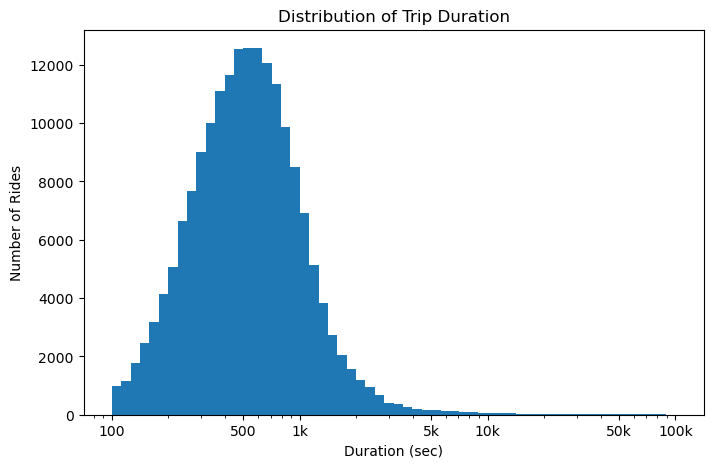

In [9]:
bins = 10 ** np.arange(2, 5+0.05, 0.05)
#ticks = ('50', '100', '500', '1k', '5k', '10k', '50k', '100k')
#labels = ['{}'.format(v) for v in ticks]
plt.figure(figsize=[8, 5])
plt.hist(data=df, x='duration_sec', bins=bins)
plt.xscale('log');
plt.title('Distribution of Trip Duration')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Rides');
plt.xticks([1e2, 5e2, 1e3, 5e3, 1e4, 5e4, 1e5], ['100', '500', '1k', '5k', '10k', '50k', '100k']);

## The influence of bike-share on daily trip duration
> There is a sharp difference in duration on Saturday and Sunday for both non bike-share and bike-share service compared to other week days. Longer trips perharps takes places during the weekends.

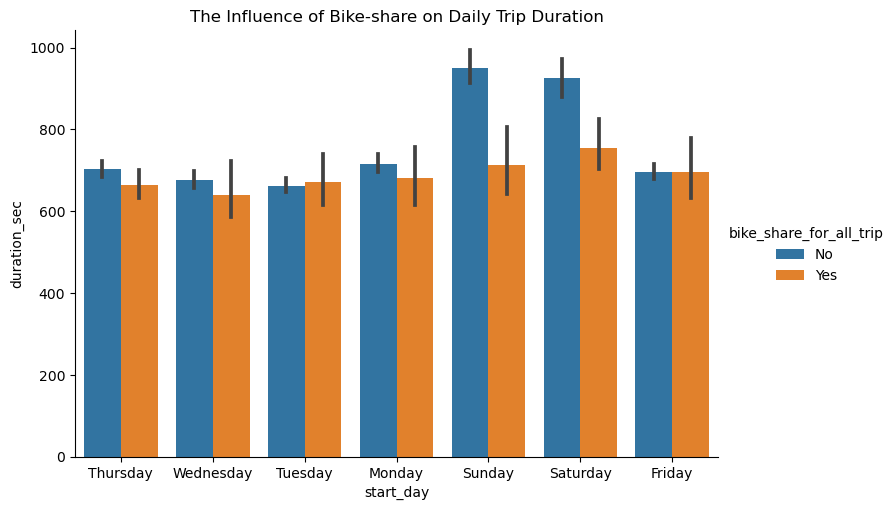

In [10]:
sns.catplot(data=df, kind="bar", x="start_day", y="duration_sec", hue="bike_share_for_all_trip", aspect=1.5);
plt.title('The Influence of Bike-share on Daily Trip Duration');

## Daily patronage of the two user types
> Customers on the average take longer trips than subscribers throuhgout the week but most on Saturdays and Sundays. While subscribers generally take shorter trips with litle increase during weekends

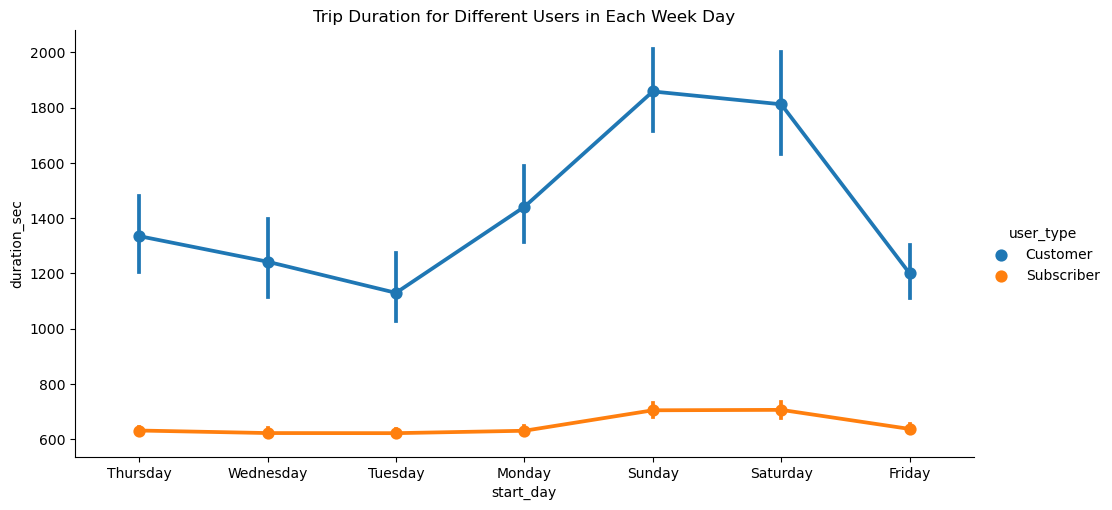

In [11]:
sns.catplot(data=df, kind="point", x="start_day", y="duration_sec", hue="user_type", aspect=2);
plt.title('Trip Duration for Different Users in Each Week Day');

## Trip duration across gender for each week day

>"Other" gender group take longer trips (duration) in each day of the week followed by the female group, while, the male gender are the least.

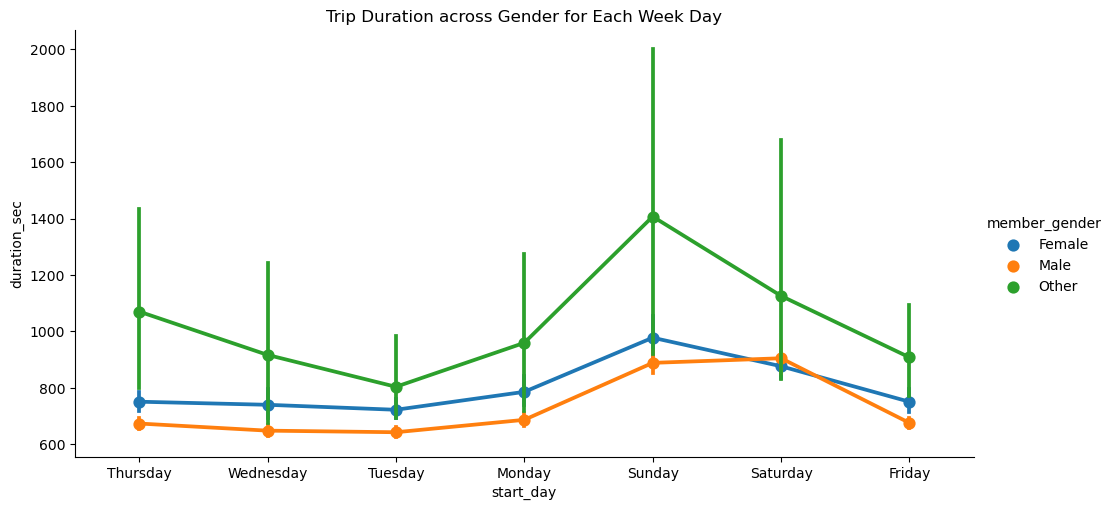

In [12]:
sns.catplot(data=df, kind="point", x="start_day", y='duration_sec', hue="member_gender", aspect=2);
plt.title('Trip Duration across Gender for Each Week Day');

In [ ]:
!jupyter nbconvert Part_II_explanatory.ipynb --to slides --post serve --no-input --no-prompt